In [43]:
import numpy as np
from robustcontrol import utils
from matplotlib import pyplot as plt
import sympy

In [44]:
s = utils.tf([1, 0])
Ga = 1/(1.25*(s + 1)*(s + 20))*utils.mimotf([[s - 1, s], [-42, s - 20]])
Gb = 1/(s**2 + 0.1)*utils.mimotf([[1, 0.1*(s - 1)], [10*(s + 0.1)/s, (s + 0.1)/s]])

In [45]:
za = utils.RHPonly([round(zi, 3) for zi in utils.zeros(Ga)])
pa = utils.RHPonly([round(pi, 3) for pi in utils.poles(Ga)])

zb = utils.RHPonly([round(zi, 3) for zi in utils.zeros(Gb)])
pb = utils.RHPonly([round(pi, 3) for pi in utils.poles(Gb)])

print('RHP Zeros of Ga are:', za)
print('RHP Poles of Ga are:', pa)

print('RHP Zeros of Ga are:', zb)
print('RHP Poles of Ga are:', pb)

print('RHP zero at s = 2 can cause controllability issues due to an introduced instability')

RHP Zeros of Ga are: []
RHP Poles of Ga are: []
RHP Zeros of Ga are: [(2+0j)]
RHP Poles of Ga are: []
RHP zero at s = 2 can cause controllability issues due to an introduced instability


In [18]:
w = np.logspace(-3, 3, 1000)
s = 1j*w


def g11a(s):
    return s - 1 
def g12a(s):
    return s
def g21a(s):
    return -42
def g22a(s):
    return s - 20
def Ga(s):
    return 1/(1.25*(s + 1)*(s + 20))*np.matrix([[s - 1, s], [-42, s - 20]])


def λ_11a(s):
    return 1/(1 - ((g12a(s)*g21a(s))/(g11a(s)*g22a(s))))


λ11a = np.array([λ_11a(i) for i in s])
λ21a = 1 - λ11a

In [19]:
def g11b(s):
    return 1
def g12b(s):
    return 0.1*(s - 1)
def g21b(s):
    return 10*(s + 0.1)/s
def g22b(s):
    return (s + 0.1)/s
def Gb(s):
    return 1/(s**2 + 0.1)*np.matrix([[1, 0.1*(s - 1)], [10*(s + 0.1)/s,  (s + 0.1)/s]])


def λ_11b(s):
    return 1/(1 - ((g12b(s)*g21b(s))/(g11b(s)*g22b(s))))


λ11b = np.array([λ_11b(i) for i in s])
λ21b = 1 - λ11b

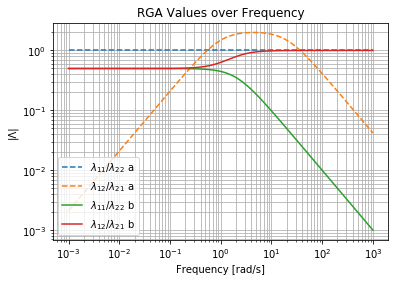

In [20]:
plt.figure(1)
plt.title('RGA Values over Frequency')
plt.xlabel(r'Frequency [rad/s]')
plt.ylabel(r'|Λ|')
plt.loglog(w, abs(λ11a), label='$\lambda_{11}/\lambda_{22}$ a', ls='--')
plt.loglog(w, abs(λ21a), label='$\lambda_{12}/\lambda_{21}$ a', ls='--')
plt.loglog(w, abs(λ11b), label='$\lambda_{11}/\lambda_{22}$ b')
plt.loglog(w, abs(λ21b), label='$\lambda_{12}/\lambda_{21}$ b')
plt.grid(b=None, which='both', axis='both')
plt.legend(loc=3)

In [41]:
RGA_a = np.matrix([[round(λ_11a(0), 3), round(1 - λ_11a(0), 3)], [round(1 - λ_11a(0), 3), round(λ_11a(0), 3)]])
RGA_b = np.matrix([[round(λ_11b(1e-10), 3), round(1 - λ_11b(1e-10), 3)], [round(1 - λ_11b(1e-10), 3), round(λ_11b(1e-10), 3)]])

RGA_a, RGA_b

(matrix([[1., 0.],
         [0., 1.]]),
 matrix([[0.5, 0.5],
         [0.5, 0.5]]))